In [1]:
#!pip install muon scanpy hvplot statsmodels scikit-learn

In [5]:
import scanpy as sc
import muon as mu
import stream2 as st2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from session_info import show
show()

In [ ]:
import os
os.chdir('GitHub/STREAM2_tutorials/tutorial_notebooks/')

# Multi-modal trajectory inference demo

We load four assays (two ATAC and two RNA) integrated into one anndata object. 

adata_integrated.X contains gene expression for RNA and gene scores for ATAC. <br> However this is just to illustrate, We can use anything we want (e.g., peaks, motif matrix instead of gene score for ATAC)

It only contains ~300 randomly chosen highly variable genes (just to make the data lighter to share)

/usr/conda/envs/x/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/usr/conda/envs/x/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


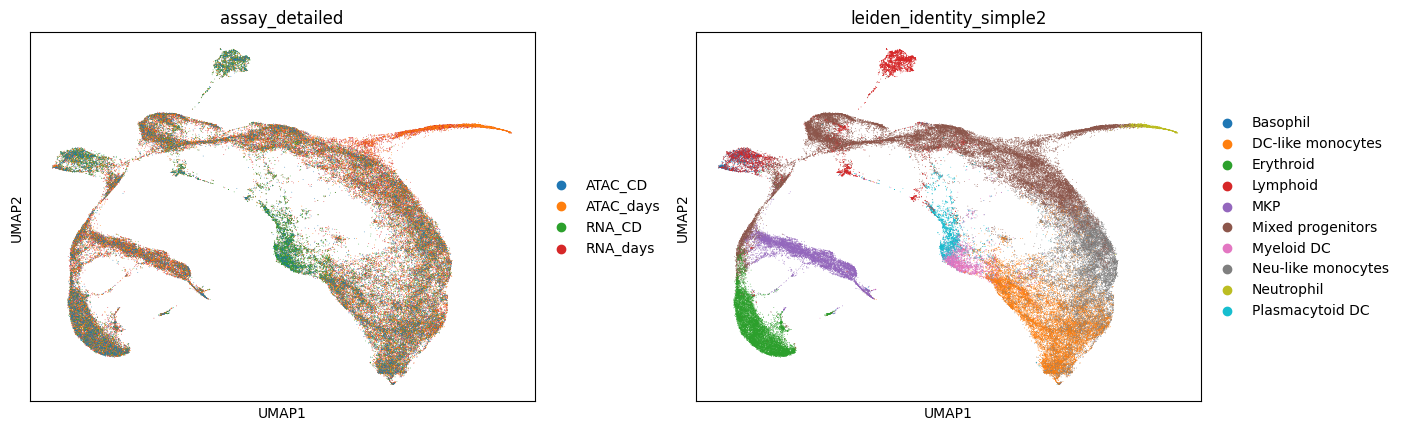

In [8]:
adata_integrated = st2.read_h5ad('../data/multiomics/atac_rna_toy.h5ad')

#sc.pp.neighbors(adata_integrated,n_neighbors=50,metric='cosine',use_rep='X_pca_transp_emd')
#sc.tl.umap(adata_integrated,min_dist=0.05)
sc.pl.umap(adata_integrated[::-1],color=['assay_detailed','leiden_identity_simple2',],wspace=.2)

In this case we have 4 assays with same features (since we only loaded gene scores for ATAC), which fits nicely into a single anndata.

However in general it is not possible to simply concatenate assays with possibly different features and observations into a single anndata.

The solution is to use the muon package and its MuData format to store our multimodal assays

In [9]:
assays = adata_integrated.obs['assay_detailed']
adatas = {assay: adata_integrated[assays==assay] for assay in assays.unique()}
mdata = mu.MuData(adatas)
mdata

/usr/conda/envs/x/lib/python3.9/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


MuData object with n_obs × n_vars = 99955 × 1284
  4 modalities
    ATAC_CD:	13575 x 321
      obs:	'label', 'cell_ids_from_max', 'cell_ids_from_quantile', 'cell_ids_from_max_lineage', 'cell_ids_from_max_lineage_smooth', 'cell_ids_from_max_smooth', 'cell_ids_from_max_lin_corrected', 'cell_ids_from_max_lin_corrected_simple', 'leiden', 'leiden_identity', 'leiden_identity_simple', 'cell_ids_from_max_mono_neutro_dc_vitro', 'cell_ids_from_max_mono_neutro_dc_vitro_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo', 'cell_ids_from_max_mono_neutro_dc_vivo_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro_smooth', 'cell_ids_from_max_mono_subtypes', 'cell_ids_from_max_mono_subtypes_smooth', 'leiden_identity_simple2', 'assay_detailed', 'assay', 'epg_node_id', 'epg_node_dist', 'epg_edge_id', 'epg_edge_loc', 'epg_pseudotime'
      uns:	'color', 'epg', 'epg_pseudotime_params', 'hvg', 'leiden_identity_simple2_colors', 'neighbors', 'pca', 'seed', 'seed_epg', 'umap'
      obsm:	'X_dr', 'X_pca', 'X_pca_target', 'X_pca_transp', 'X_pca_transp_emd', 'X_umap'
      obsp:	'connectivities', 'distances'
    ATAC_days:	19206 x 321
      obs:	'label', 'cell_ids_from_max', 'cell_ids_from_quantile', 'cell_ids_from_max_lineage', 'cell_ids_from_max_lineage_smooth', 'cell_ids_from_max_smooth', 'cell_ids_from_max_lin_corrected', 'cell_ids_from_max_lin_corrected_simple', 'leiden', 'leiden_identity', 'leiden_identity_simple', 'cell_ids_from_max_mono_neutro_dc_vitro', 'cell_ids_from_max_mono_neutro_dc_vitro_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo', 'cell_ids_from_max_mono_neutro_dc_vivo_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro_smooth', 'cell_ids_from_max_mono_subtypes', 'cell_ids_from_max_mono_subtypes_smooth', 'leiden_identity_simple2', 'assay_detailed', 'assay', 'epg_node_id', 'epg_node_dist', 'epg_edge_id', 'epg_edge_loc', 'epg_pseudotime'
      uns:	'color', 'epg', 'epg_pseudotime_params', 'hvg', 'leiden_identity_simple2_colors', 'neighbors', 'pca', 'seed', 'seed_epg', 'umap'
      obsm:	'X_dr', 'X_pca', 'X_pca_target', 'X_pca_transp', 'X_pca_transp_emd', 'X_umap'
      obsp:	'connectivities', 'distances'
    RNA_CD:	22804 x 321
      obs:	'label', 'cell_ids_from_max', 'cell_ids_from_quantile', 'cell_ids_from_max_lineage', 'cell_ids_from_max_lineage_smooth', 'cell_ids_from_max_smooth', 'cell_ids_from_max_lin_corrected', 'cell_ids_from_max_lin_corrected_simple', 'leiden', 'leiden_identity', 'leiden_identity_simple', 'cell_ids_from_max_mono_neutro_dc_vitro', 'cell_ids_from_max_mono_neutro_dc_vitro_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo', 'cell_ids_from_max_mono_neutro_dc_vivo_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro_smooth', 'cell_ids_from_max_mono_subtypes', 'cell_ids_from_max_mono_subtypes_smooth', 'leiden_identity_simple2', 'assay_detailed', 'assay', 'epg_node_id', 'epg_node_dist', 'epg_edge_id', 'epg_edge_loc', 'epg_pseudotime'
      uns:	'color', 'epg', 'epg_pseudotime_params', 'hvg', 'leiden_identity_simple2_colors', 'neighbors', 'pca', 'seed', 'seed_epg', 'umap'
      obsm:	'X_dr', 'X_pca', 'X_pca_target', 'X_pca_transp', 'X_pca_transp_emd', 'X_umap'
      obsp:	'connectivities', 'distances'
    RNA_days:	44370 x 321
      obs:	'label', 'cell_ids_from_max', 'cell_ids_from_quantile', 'cell_ids_from_max_lineage', 'cell_ids_from_max_lineage_smooth', 'cell_ids_from_max_smooth', 'cell_ids_from_max_lin_corrected', 'cell_ids_from_max_lin_corrected_simple', 'leiden', 'leiden_identity', 'leiden_identity_simple', 'cell_ids_from_max_mono_neutro_dc_vitro', 'cell_ids_from_max_mono_neutro_dc_vitro_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo', 'cell_ids_from_max_mono_neutro_dc_vivo_smooth', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro', 'cell_ids_from_max_mono_neutro_dc_vivo_plus_vitro_smooth', 'cell_ids_from_max_mono_subtypes', 'cell_ids_from_max

In our case cells are not matched between assays so we had to perform data integration to get a joint UMAP representation <br>
We will learn a joint trajectory based on this joint representation. Let's store it along with cell annotation at the global rather than assay level in mdata

In [10]:
mdata.obsm['X_dr'] = mdata.obsm['X_umap'] = np.vstack([adata.obsm['X_umap'] for adata in mdata.mod.values()])
mdata.obs['leiden_identity_simple2'] = np.hstack([adata.obs['leiden_identity_simple2'] for adata in mdata.mod.values()])

If your data contains matched cells, you have more choice and can learn the trajectory based on:
- some RNA representation
- some ATAC representation 
- some joint RNA+ATAC representation obtained using your favorite method e.g.:
  - MOFA (mu.tl.mofa(mdata))
  - J-UMAP https://github.com/canzarlab/JVis-learn
  - UMAP tutorial for multiple views https://umap-learn.readthedocs.io/en/latest/composing_models.html
  
If your data contains non-matched cells then we need to match and integrate assays into a joint representation. Some suggestions of methods to get it:
  - Harmony, Scanorama (scanpy.pp.external)
  - Optimal transport https://pythonot.github.io/
  - Joint MDS https://github.com/BorgwardtLab/JointMDS
  - MultiMAP https://github.com/Teichlab/MultiMAP
  - Review notebook https://github.com/ComputationalSystemsBiology/momix-notebook

Let's work with a subsample (just to speed up trajectory inference, it's also fine to use mdata directly)

In [11]:
idx = np.random.RandomState(0).choice(mdata.shape[0],5000,replace=False)

a_s = sc.AnnData(mdata.obsm['X_umap'][idx])
a_s.obsm['X_dr'] = a_s.obsm['X_umap'] = a_s.X
a_s.obs['leiden_identity_simple2'] = mdata.obs['leiden_identity_simple2'][idx].values

Seed graph with a minimum spanning tree. Forbid the tree to form paths connecting Neu-like to DC-like monocytes

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


/usr/conda/envs/x/lib/python3.9/site-packages/stream2/tools/_elpigraph.py:857: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mat, init_nodes_pos, 10 ** 6, np.sum(mat ** 2, axis=1, keepdims=1)


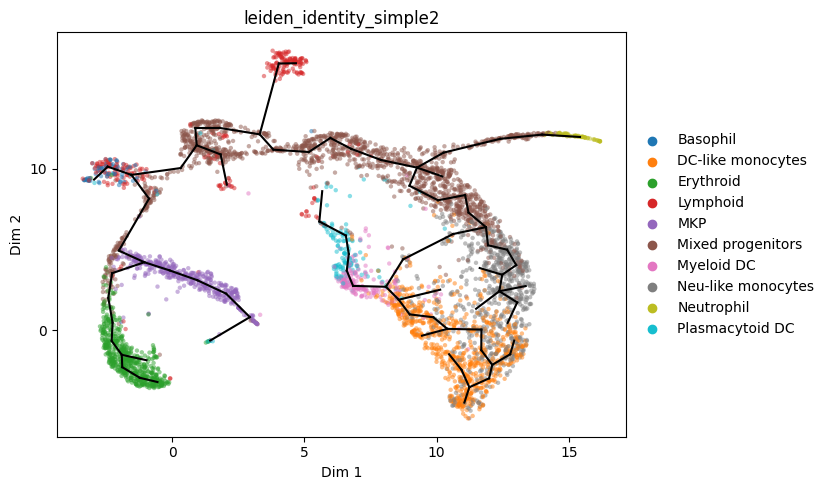

In [12]:
st2.tl.seed_graph(a_s,n_clusters=80, paths_forbidden=[['Neu-like monocytes','DC-like monocytes']],label='leiden_identity_simple2')
st2.pl.graph(a_s,color=['leiden_identity_simple2'],alpha=.5,size=10,fig_size=(8,5),key='seed_epg')

We refine the graph. 

We speed up computations by limiting the max number of candidate graphs considered when fitting.

We emphasize less dense regions with slightly higher point weights

Constructing tree 1 of 1 / Subset 1 of 1
Computing EPG with  95  nodes on  5000  points and  2  dimensions

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|13||81	1.8126	81	80	50	13	0	0	0.504	0.454	0.9915	0.9924	1.2937	0.0148	1.1968	96.9448	0
1|12||82	1.7496	82	81	53	12	0	0	0.5022	0.4546	0.9916	0.9924	1.2332	0.0143	1.1693	95.8848	0
1|11||83	1.6986	83	82	56	11	0	0	0.5013	0.4559	0.9916	0.9923	1.1829	0.0144	1.1959	99.2564	0
12||84	1.6596	84	83	58	12	0	0	0.492	0.4479	0.9917	0.9925	1.1546	0.0131	1.0982	92.2525	0
11||85	1.6202	85	84	61	11	0	0	0.4905	0.4492	0.9918	0.9925	1.1164	0.0133	1.1298	96.0343	0
10||86	1.5849	86	85	64	10	0	0	0.4853	0.4457	0.9918	0.9925	1.0868	0.0128	1.1006	94.6513	0
9||87	1.5572	87	86	67	9	0	0	0.4834	0.4453	0.9919	0.9925	1.0609	0.0129	1.1238	97.7669	0
9||88	1.5259	88	87	68	9	0	0	0.4748	0.438	0.992	0.9926	1.0391	0.0119	1.046	92.046	0
8||89	1.4977	89	88	71	8	0	0	0.4675	0.432	0.9921	0.9927	1.019	0.0112	0.9961	88.656	0
8||90	1

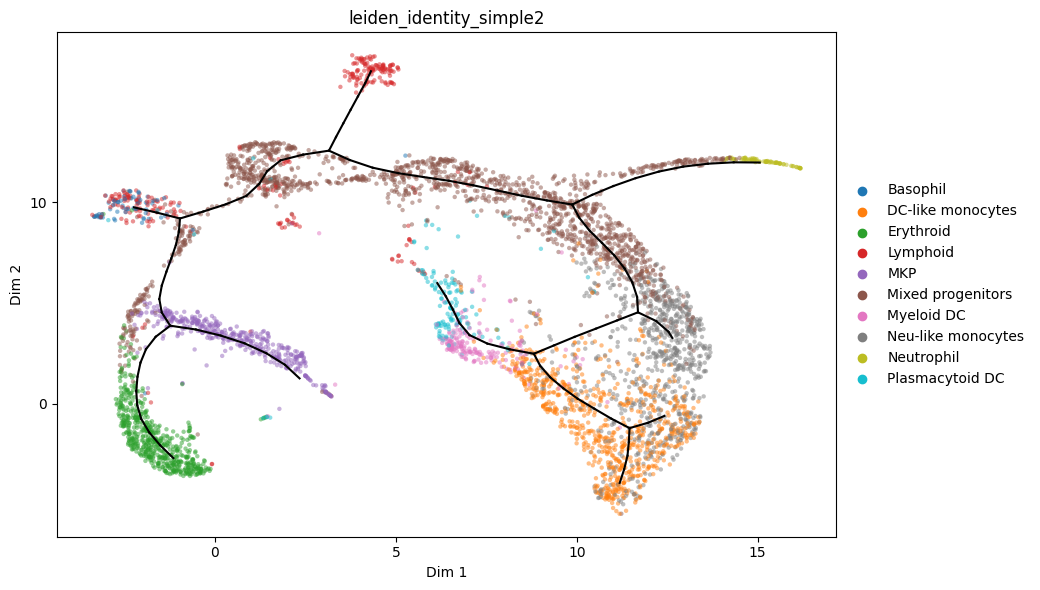

In [15]:
st2.tl.get_weights(a_s,bandwidth=2)
st2.tl.learn_graph(a_s,n_nodes=95,epg_lambda=0.02,epg_mu=0.05,epg_alpha=0.02,use_weights=True,verbose=1,
                   max_candidates = {"AddNode2Node": 10,"BisectEdge": 10,"ShrinkEdge": 0,})
st2.pl.graph(a_s,color=['leiden_identity_simple2'],alpha=.5,size=10,fig_size=(10,6))

Visualize node labels

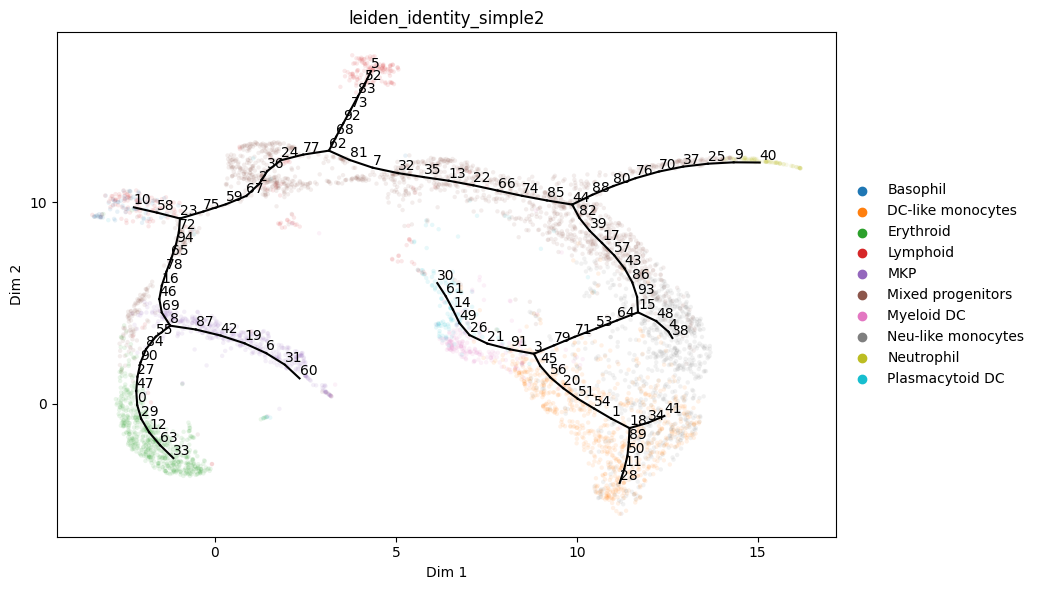

In [16]:
st2.pl.graph(a_s,color=['leiden_identity_simple2'],alpha=.1,size=10,fig_size=(10,6),show_text=1)

Fine tune the graph by:
- adding extra plausible paths
- refitting the graph while forcing some nodes to remain fixed at chosen positions
- extending leaves so branches reach the end of the distribution

Performing simulated annealing. This may take a while
Performing simulated annealing. This may take a while
Performing simulated annealing. This may take a while
Performing simulated annealing. This may take a while
Performing simulated annealing. This may take a while
Performing simulated annealing. This may take a while
Performing simulated annealing. This may take a while
(7, 2)
(112, 2)


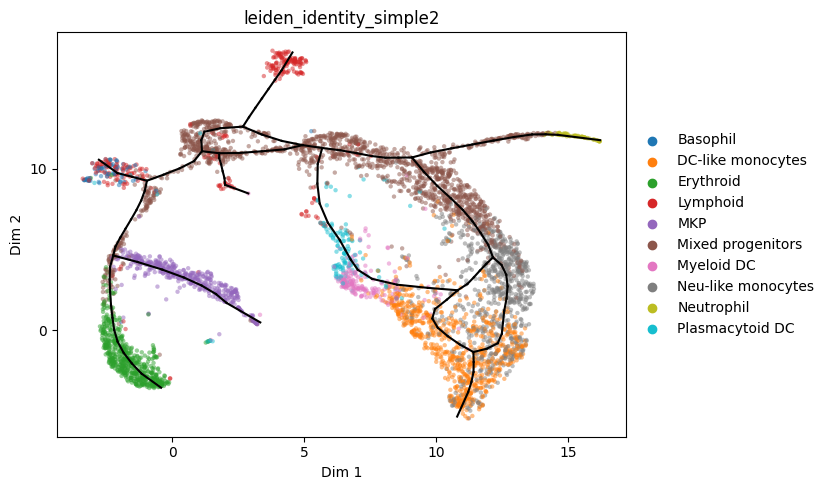

In [18]:
a_s2 = a_s.copy()

st2.tl.add_path(a_s2,38,41,refit_graph=True,use_weights=True)

st2.tl.refit_graph(a_s2,shift_nodes_pos={ 
    3 : a_s2.uns['epg']['node_pos'][3] + np.array([+2, +0]),
    24 : a_s2.uns['epg']['node_pos'][24] + np.array([-.6, +.2]),
    25 : a_s2.uns['epg']['node_pos'][25] + np.array([+0., +.2]),
    8  : a_s2.uns['epg']['node_pos'][8] + np.array([-1,  +.75]),
    44 : a_s2.uns['epg']['node_pos'][44] + np.array([-.8,+.8]),
    }
)

st2.tl.add_path(a_s2,2,32,epg_lambda=.2)
st2.tl.add_path(a_s2,30,35,epg_lambda=.2,epg_mu=.2)
st2.tl.add_path(a_s2,99,[2.,9.],epg_lambda=.2,epg_mu=.2)
st2.tl.extend_leaves(a_s2,Mode="QuantDists",ControlPar=.75)
st2.pl.graph(a_s2,color=['leiden_identity_simple2'],alpha=.5,size=10,fig_size=(8,5))

Store graph computed on the subsample back to mdata with the full dataset

In [19]:
mdata.uns = a_s2.uns.copy()
# this recomputes the projection of cells onto the graph
st2.tl._elpigraph._store_graph_attributes(mdata,mdata.obsm['X_dr'],'epg')

Infer pseudotime for a given root node

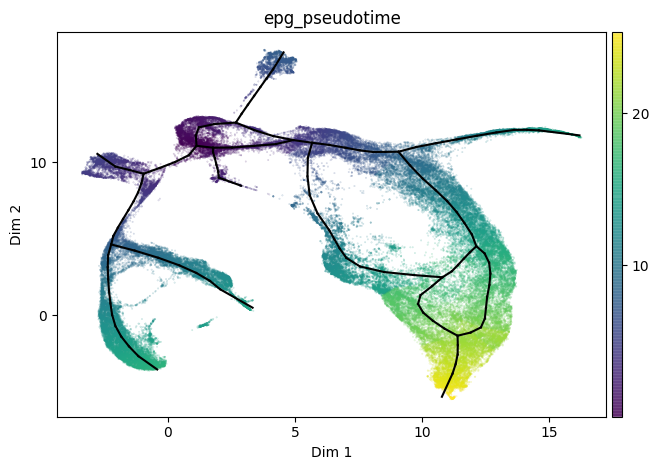

In [20]:
st2.tl.infer_pseudotime(mdata,source=2)
st2.pl.graph(mdata,color=['epg_pseudotime'],size=.1,alpha=.3)

Infer pseudotime for a given path

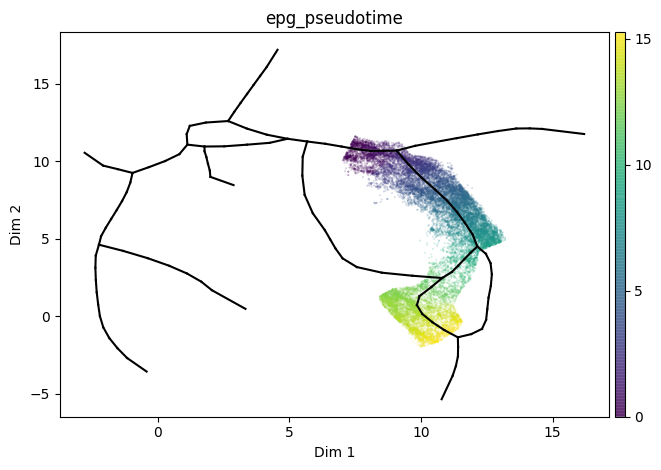

In [21]:
st2.tl.infer_pseudotime(mdata,source=66,target=1)
st2.pl.graph(mdata,color=['epg_pseudotime'],size=.1,alpha=.3)

Use nodes_to_include to take a longer path rather than the shortest (default)

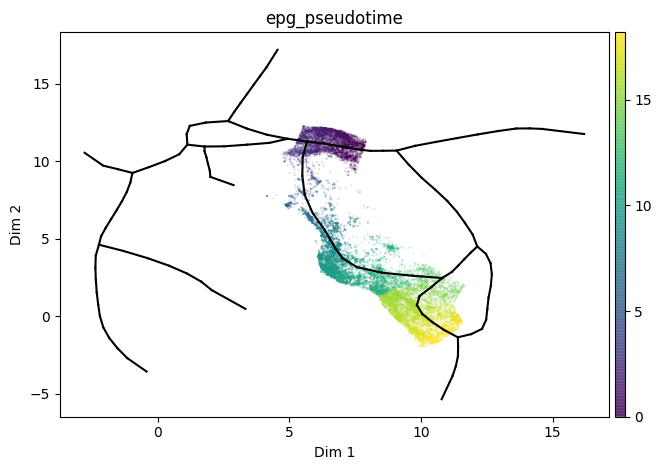

In [22]:
st2.tl.infer_pseudotime(mdata,source=66,target=1,nodes_to_include=[26])
st2.pl.graph(mdata,color=['epg_pseudotime'],size=.1,alpha=.3)

Let's investigate Erythroids. We compute transition markers (that go up or down along the path) for each assay separately

method = 'spearman' for spearman correlation

method = 'xi' for non-linear XI correlation, returns values between 0-1

/usr/conda/envs/x/lib/python3.9/site-packages/stream2/tools/_pseudotime.py:109: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f"{key}_pseudotime"] = np.nan


2905 Cells are selected for Path_Source_Nodes-to-include_Target :  Path_24-None-115
Filtering out markers that are expressed in less than 5 cells ...
321 markers are being scanned ...


/usr/conda/envs/x/lib/python3.9/site-packages/stream2/tools/_pseudotime.py:109: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f"{key}_pseudotime"] = np.nan


3508 Cells are selected for Path_Source_Nodes-to-include_Target :  Path_24-None-115
Filtering out markers that are expressed in less than 5 cells ...
321 markers are being scanned ...
3993 Cells are selected for Path_Source_Nodes-to-include_Target :  Path_24-None-115
Filtering out markers that are expressed in less than 5 cells ...
321 markers are being scanned ...
9514 Cells are selected for Path_Source_Nodes-to-include_Target :  Path_24-None-115
Filtering out markers that are expressed in less than 5 cells ...
321 markers are being scanned ...


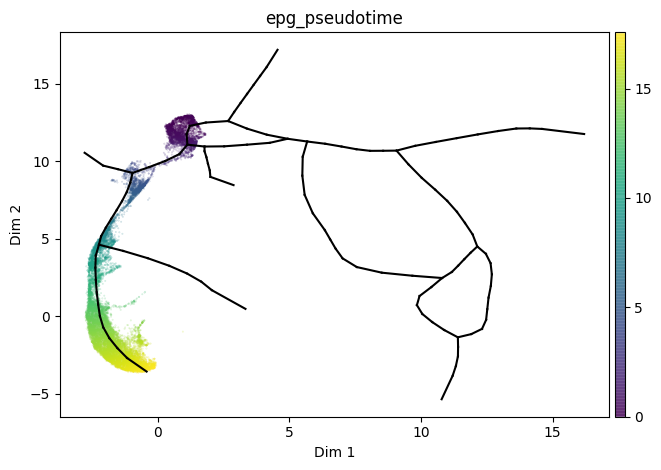

In [23]:
source, target = 24, 115

st2.tl.infer_pseudotime(mdata,source=24,target=115)
st2.pl.graph(mdata,color=['epg_pseudotime'],size=.1,alpha=.3)

transition_markers = {}
for assay,adata in mdata.mod.items():
    st2.tl.infer_pseudotime(adata,source=24,target=115)
    st2.tl.detect_transition_markers(adata,fc_cutoff=0., method='spearman')
    
    transition_markers[assay] = adata.uns['transition_markers'][f'Path_{source}-None-{target}']

Plot results

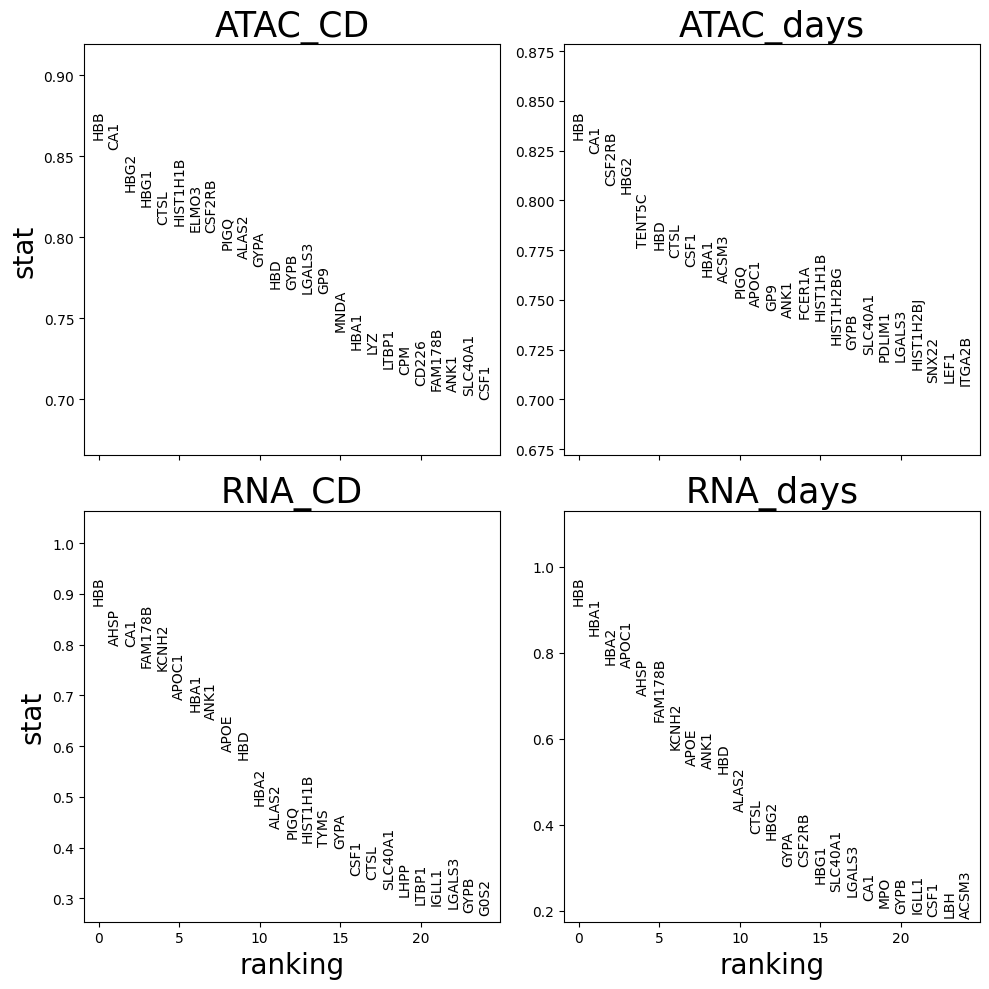

:NdOverlay   [assay_detailed]
   :Scatter   [stat]   (logfc,var_names)

In [24]:
def plot_top_markers(transition_markers,sort_by = 'logfc',n_genes = 25):
    
    f,axs=plt.subplots(2,2,figsize=(10,10),sharex=True)
    axs=axs.flat
    for i,n in zip(range(len(transition_markers)),transition_markers.keys()): 
        
        # get data
        df = transition_markers[n][sort_by].sort_values()[::-1][:n_genes]
        gene_names, scores = df.index, df.values

        # plot 
        ymax, ymin = np.max(scores), np.min(scores) - 0.05*np.min(scores)
        ymax += 0.3 * (ymax - ymin)

        ax=next(axs)
        ax.set_ylim(ymin, ymax)
        ax.set_xlim(-0.9, n_genes - 0.1)
        ax.set_title(n,fontsize=25)
        if i>1: ax.set_xlabel('ranking',fontsize=20)
        if i==0 or i==2: ax.set_ylabel(sort_by,fontsize=20)

        # Making labels
        for ig, gene_name in enumerate(gene_names):
            ax.text(ig,scores[ig],gene_name,rotation='vertical',verticalalignment='bottom',horizontalalignment='center',fontsize=10,)
    plt.tight_layout(); plt.show()
    
    
plot_top_markers(transition_markers, sort_by = 'stat',n_genes = 25,)

df = pd.concat(transition_markers).reset_index().rename(columns={'level_0':'assay_detailed','level_1':'var_names'})
df.hvplot.scatter("stat", "logfc", flip_yaxis=False, logy=False, by='assay_detailed',hover_cols=["var_names"],height=500,width=800)

Let's check some of those markers found in several assays

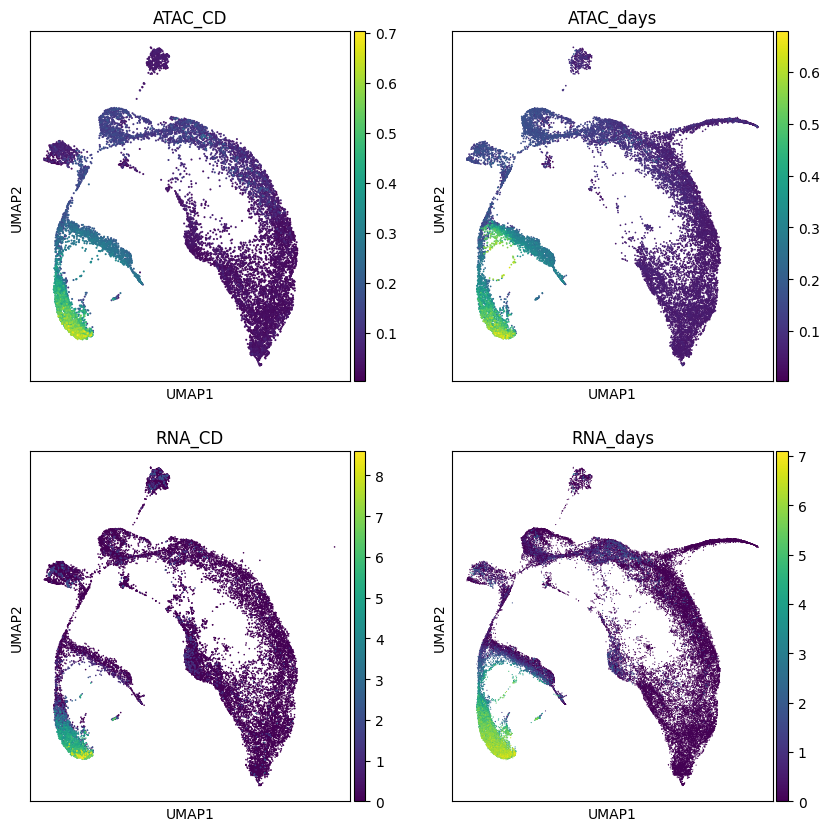

In [25]:
def scatterplot_assays(color):
    f,axs=plt.subplots(2,2,figsize=(10,10),sharex=True)
    axs=axs.flat
    for assay,adata in mdata.mod.items():
        ax=next(axs)
        sc.pl.umap(adata,color=color,ax=ax,show=False)
        ax.set_title(assay)
    plt.show()

scatterplot_assays('HBB')

We can naively average stats of features with same name across assays to get a consensus ranking

Top positive
HBB


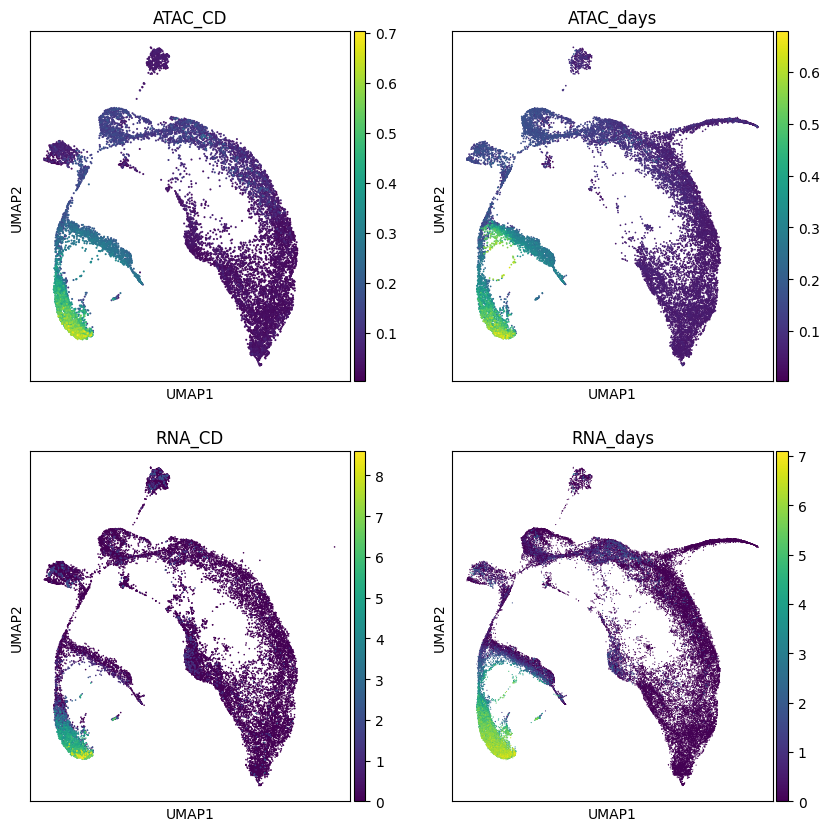

Top negative
HLA-DRA


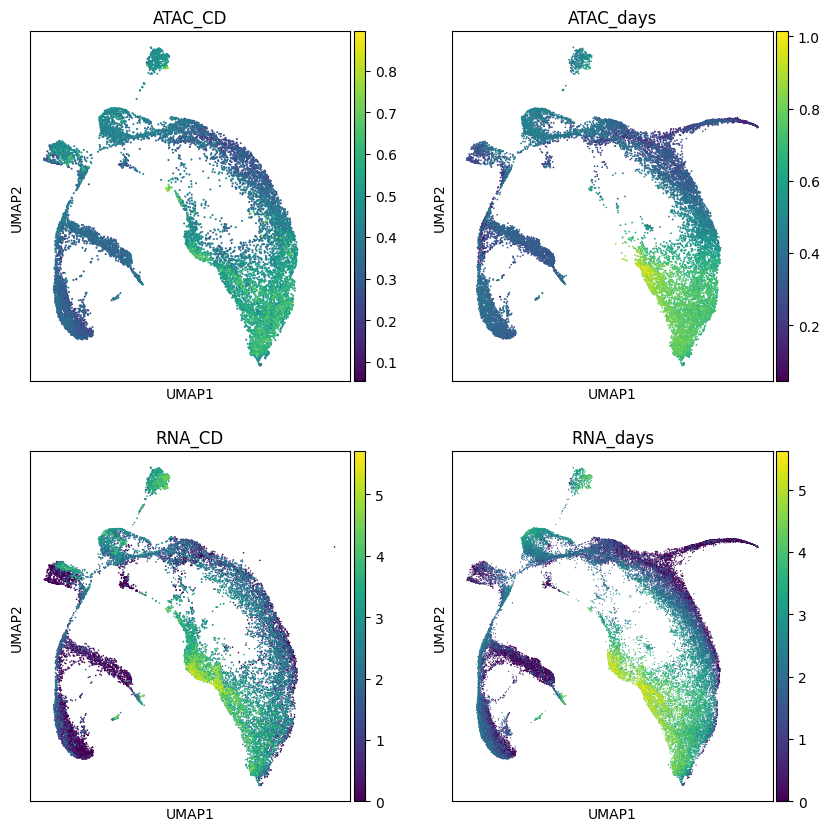

In [26]:
avg_stat = st2.tl._markers.average_stat(mdata,transition_markers,).sort_values()
top_positive, top_negative = avg_stat[-1:].index[::-1], avg_stat[:1].index

print('Top positive')
for gene in top_positive:
    print(gene); scatterplot_assays(gene)
    
print('Top negative')
for gene in top_negative:
    print(gene); scatterplot_assays(gene)

Rather than considering rankings separately or averaging, we can try to correlate assays directly.

In our case cells are not matched across assays; this means they will have different pseudotime values

To deal with this a simple approach is to interpolate data and resample at the same pseudotime values. If your cells are matched you don't need this step

In [27]:
interpolated = {}
for assay, adata in mdata.mod.items():
    interpolated[assay] = st2.tl.interpolate(adata,t_len=200,method='knn',frac=.1,n_neighbors='auto',weights='uniform')[1]

Now that we have data with the same pseudotime values we can correlate variables with same name across assays

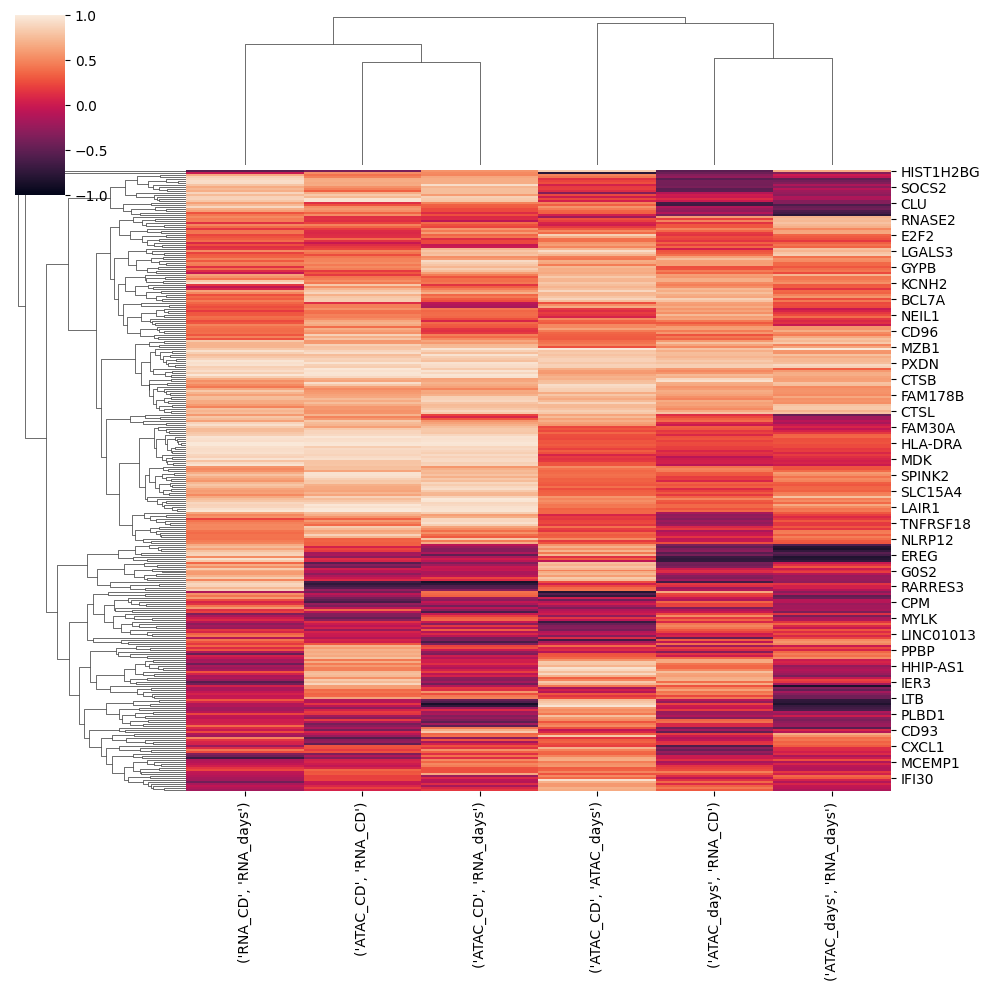

In [28]:
correlations = {}
modalities = list(mdata.mod.keys())

for i in range(mdata.n_mod-1):
    for j in range(i+1,mdata.n_mod):
                                                    
        correlations[modalities[i],modalities[j]] = st2.tl.spearman_columns(interpolated[modalities[i]],
                                                                            interpolated[modalities[j]])
                                                   #or st2.tl.xicorr_columns()[0]
            
correlations = pd.DataFrame(correlations)
correlations.index = mdata[modalities[0]].var_names
correlations.columns = correlations.columns.to_flat_index()
sns.clustermap(correlations.dropna(),vmin=-1,vmax=1)

If variables were different across assays we could correlate all with all instead

/usr/conda/envs/x/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


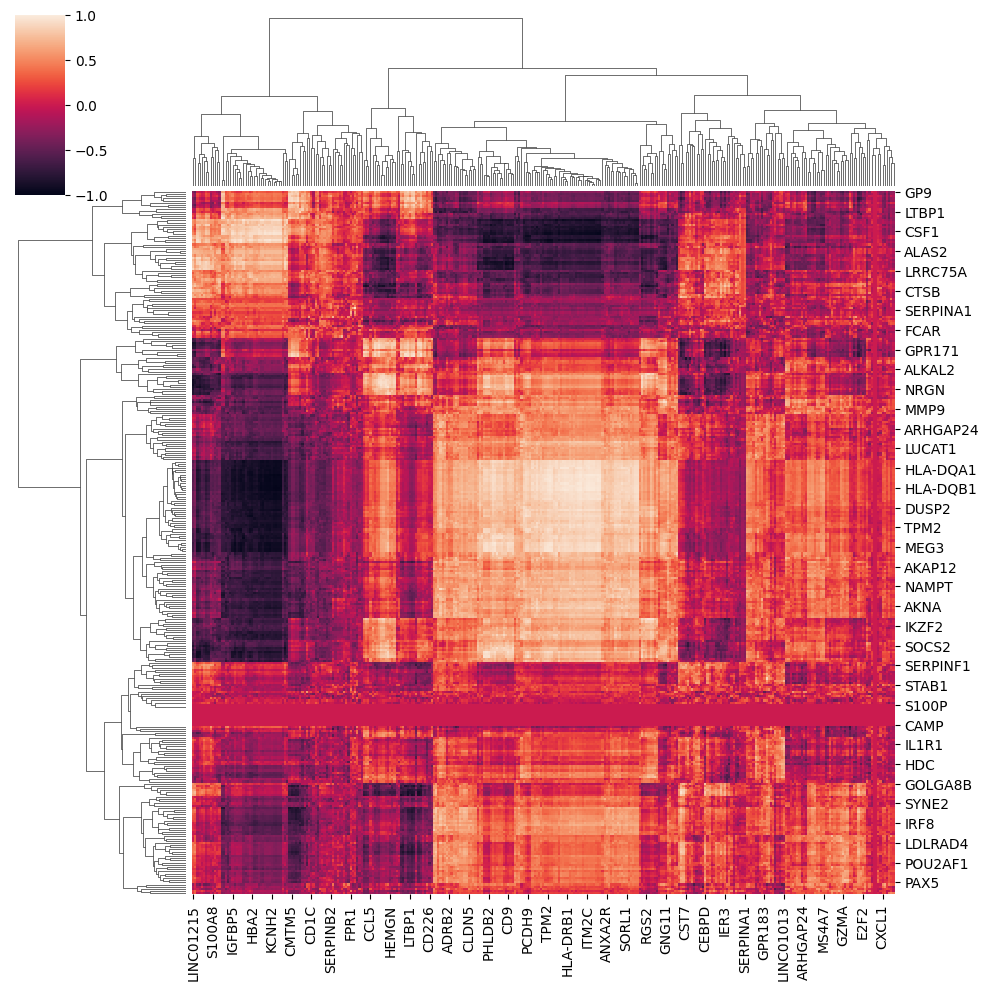

In [29]:
correlations_all = {}
modalities = list(mdata.mod.keys())
for i in range(mdata.n_mod-1):
    for j in range(i+1,mdata.n_mod):
        correlations_all[modalities[i],modalities[j]] = st2.tl.spearman_pairwise(interpolated[modalities[i]],
                                                                                 interpolated[modalities[j]])
                                                        #or st2.tl.xicorr_pairwise()[0]


mi,mj = 'RNA_CD','RNA_days'
corrs_all = pd.DataFrame(correlations_all[mi,mj])
corrs_all.index, corrs_all.columns = mdata[mi].var_names, mdata[mj].var_names
corrs_all[corrs_all.isna()]=0.
sns.clustermap(corrs_all,vmin=-1,vmax=1)

Let's visualize results as scatter plots. 

e.g., we can plot spearman correlation against pseudotime for two assays and color by their correlation.

In [30]:
def plot_two_assays(transition_markers,mod1, mod2, plot_var='stat',color='dodgerblue',cmap='Viridis'):
    selected = [mod1,mod2]
    selected_dfs = {k:v for k,v in transition_markers.items() if k in selected}
    df = pd.concat(selected_dfs,axis=1,keys=selected).dropna()
    df.columns = df.columns.to_flat_index().map(lambda s:' '.join(s))
    
    if type(color)!=str: 
        df = df.join(color)
        color, clabel = df[color.name], color.name
    else:
        clabel = color
        
    df.index.name='var_name'
    return df.hvplot.scatter(f'{mod1} {plot_var}',f'{mod2} {plot_var}', hover_cols=["var_name"],
                             color=color,cmap=cmap,clabel=clabel, hover=True,
                             xlim=(-1.05,1.05),ylim=(-1.05,1.05),height=500,width=600)

def compose_fig(plots,ncols=2):
    figure = '('+ '+'.join([f'plots[{i}]' for i in range(len(plots))]) + f').cols({ncols})'
    return eval(figure)
    
plots = []
for i in range(mdata.n_mod-1):
    for j in range(i+1,mdata.n_mod):
        color = correlations[modalities[i],modalities[j]].rename('correlation '+modalities[i]+' vs '+modalities[j])
        plots.append( plot_two_assays(transition_markers,modalities[i],modalities[j], plot_var='stat', color=color) )
        
compose_fig(plots,2)

:Layout
   .Scatter.I   :Scatter   [ATAC_CD stat]   (ATAC_days stat,_color,var_name)
   .Scatter.II  :Scatter   [ATAC_CD stat]   (RNA_CD stat,_color,var_name)
   .Scatter.III :Scatter   [ATAC_CD stat]   (RNA_days stat,_color,var_name)
   .Scatter.IV  :Scatter   [ATAC_days stat]   (RNA_CD stat,_color,var_name)
   .Scatter.V   :Scatter   [ATAC_days stat]   (RNA_days stat,_color,var_name)
   .Scatter.VI  :Scatter   [RNA_CD stat]   (RNA_days stat,_color,var_name)